# Learning curve

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve, StratifiedGroupKFold
import xgboost as xgb
import biutils

from sklearn.preprocessing import LabelEncoder


define pipeline

In [14]:
xgb_opt = xgb.XGBClassifier( booster='gbtree',  learning_rate=0.1, max_depth=2, max_leaves=None,
              min_child_weight=3,  n_estimators=200, predictor=None, random_state=np.random.RandomState())


define data

In [15]:
# retrieve table from database
binary = biutils.get_tbl('binary')
no_out = biutils.get_tbl('bino_out')
zdata = biutils.get_tbl("bizdata")

In [9]:
model = xgb_opt
model_name = "XGBoost"
ppl = Pipeline([('scaler', StandardScaler()),
                      ('mdl',model)])

intervars =['triglycerylfatcrossp(TGFRupper) FAT14ratio', 
'methylfat(FMETD10) FAT14ratio', 
'olefinicfat(UFD54) FAT14ratio', 
'fat(4p2_3p9) FAT14ratio', 
'methylenefat(FAT21) FAT14ratio', 
'fat(2p06_1p32) ratioWAT47_1d', 
'adc', 'gly+myo FAT14ratio', 
'fat(1p32_0p9) FAT14ratio']

X = no_out[intervars]
print(X.shape)
y =  LabelEncoder().fit_transform(no_out.label)

(436, 9)


plot

Text(0.5, 1.0, 'Learning curve for XGBoost')

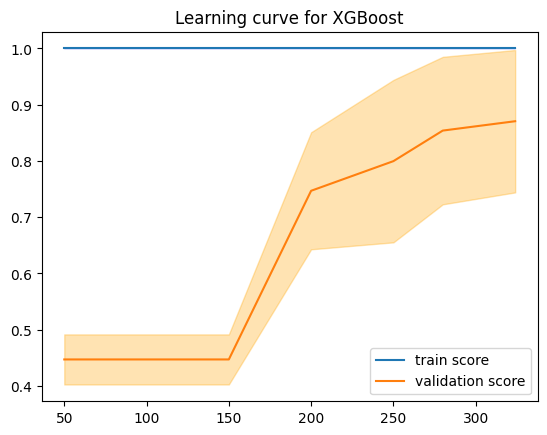

In [10]:
train_sizes, train_scores, valid_scores = learning_curve(ppl, X, y, groups = list(no_out.dataset),train_sizes=[50,100,150,200,250,280,324], cv=StratifiedGroupKFold(5))
plt.plot(train_sizes,[np.mean(i) for i in train_scores],label="train score")
plt.plot(train_sizes,[np.mean(i) for i in valid_scores],label="validation score")
plt.legend()
ax = plt.gca()
ax.fill_between(
        train_sizes,
        valid_scores.mean(axis=1) - valid_scores.std(axis=1),
        valid_scores.mean(axis=1) + valid_scores.std(axis=1),
        alpha=0.3,
        color = 'orange'
    )
ax.fill_between(
        train_sizes,
        train_scores.mean(axis=1) - train_scores.std(axis=1),
        train_scores.mean(axis=1) + train_scores.std(axis=1),
        alpha = 0.3,
        color = 'blue'
    )
plt.title("Learning curve for "+model_name)